<a href="https://colab.research.google.com/github/Mhkkks/ASR-Bias-Computational-Analysis/blob/main/Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup and Data Download

In [ ]:
print("Deleting corrupted files...")
!rm -rf MonoTED_data
!rm -f MonoTED.zip
print("Cleanup complete.")

Deleting corrupted files...
Cleanup complete.


In [1]:
import os
import zipfile

# Define file and directory names
zip_file_path = "MonoTED.zip"
data_directory = "MonoTED_data"

# Fresh Download ---
# This is the wget command.
print("\nStep 2: Starting a fresh download of the dataset...")
get_ipython().system(f'wget -q -O {zip_file_path} "https://www.dropbox.com/scl/fi/2fujwuor01w5otjnwa67c/MonoTED.zip?rlkey=sebwtabqnuwtirmwi7m92z7bm&e=3&dl=1"')
print("Download complete!")

# --- Part 3: Fresh Unzip ---
print("\nStep 3: Unzipping the files...")
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(data_directory)
print("Unzipping complete! Your data is now ready.")


Step 2: Starting a fresh download of the dataset...
Download complete!

Step 3: Unzipping the files...
Unzipping complete! Your data is now ready.


In [5]:
#checking if audio files present
!ls MonoTED_data/MonoTED/audio/*.sph

ls: cannot access 'MonoTED_data/MonoTED/audio/*.sph': No such file or directory


Zip structure

In [6]:
!ls -R MonoTED_data

MonoTED_data:
MonoTED

MonoTED_data/MonoTED:
audio  names_and_labels.csv  README.txt  transcripts

MonoTED_data/MonoTED/audio:

MonoTED_data/MonoTED/transcripts:
AaronHuey_2010X.txt		  JoshuaPrinceRamus_2009X.txt
AbhaDawesar_2013G.txt		  JoshuaSmith_2016S.txt
AbigailMarsh_2016T.txt		  JR_2012.txt
AbrahamVerghese_2011G.txt	  JuanEnriquez_2016T.txt
AchenyoIdachaba_2015W.txt	  JuliaBacha_2016T.txt
AdamDavidson_2012S.txt		  JulianaMachadoFerreira_2010U.txt
AdamGalinsky_2016X.txt		  JulianaRotich_2013G.txt
AdamGrant_2016.txt		  JulianBaggini_2011X.txt
AdamSavage_2016.txt		  KakenyaNtaiya_2012X.txt
AdamSpencer_2013.txt		  KamalMeattle_2009U.txt
AditiGupta_2015X.txt		  KarenThompsonWalker_2012G.txt
AditiShankardass_2009I.txt	  KarimaBennoune_2014X.txt
AdoraSvitak_2010.txt		  KarimAbouelnaga_2017U.txt
AjitNarayanan_2013.txt		  KaryMullis_2009.txt
AlaaMurabit_2015W.txt		  KateAdams_2016S.txt
AlanRussell_2006.txt		  KateStone_2013.txt
AlanSiegel_2010.txt		  KatherineFulton_2007.txt
AlbertoCairo_

In [4]:
#removing audio files
!rm MonoTED_data/MonoTED/audio/*.sph

In [8]:
#size of file
!du -sh MonoTED_data

12M	MonoTED_data


In [9]:
#downloading files
!zip -r my_data.zip MonoTED_data

  adding: MonoTED_data/ (stored 0%)
  adding: MonoTED_data/MonoTED/ (stored 0%)
  adding: MonoTED_data/MonoTED/names_and_labels.csv (deflated 60%)
  adding: MonoTED_data/MonoTED/transcripts/ (stored 0%)
  adding: MonoTED_data/MonoTED/transcripts/CarolDweck_2014X.txt (deflated 56%)
  adding: MonoTED_data/MonoTED/transcripts/AtulGawande_2012.txt (deflated 59%)
  adding: MonoTED_data/MonoTED/transcripts/ArvindGupta_2010P.txt (deflated 60%)
  adding: MonoTED_data/MonoTED/transcripts/LesleyHazleton_2013G.txt (deflated 55%)
  adding: MonoTED_data/MonoTED/transcripts/JamaisCascio_2006.txt (deflated 58%)
  adding: MonoTED_data/MonoTED/transcripts/SethGodin_2009.txt (deflated 61%)
  adding: MonoTED_data/MonoTED/transcripts/JohnHardy_2010G.txt (deflated 57%)
  adding: MonoTED_data/MonoTED/transcripts/MohamedAli_2013Z.txt (deflated 58%)
  adding: MonoTED_data/MonoTED/transcripts/ZahraLanghi_2012X.txt (deflated 57%)
  adding: MonoTED_data/MonoTED/transcripts/RobinMorgan_2015W.txt (deflated 52%)
  

Load and Inspect the Metadata

In [ ]:
import pandas as pd
import os

# The path with the correct filename
metadata_file_path = os.path.join('MonoTED_data', 'MonoTED', 'names_and_labels.csv')

print(f"Attempting to load data from: {metadata_file_path}")

# Load the DataFrame (removed sep='\t' since it's a CSV)
df = pd.read_csv(metadata_file_path)

print("\nSuccess! DataFrame loaded correctly.")
print("--------------------------------------")

# --- Initial Inspection ---
print("First 5 Rows:")
print(df.head())

Attempting to load data from: MonoTED_data/MonoTED/names_and_labels.csv

Success! DataFrame loaded correctly.
--------------------------------------
First 5 Rows:
               Name                   File   Age Gender   Race Language  \
0        Aaron Huey        AaronHuey_2010X  35.0      M  White       US   
1      Abha Dawesar      AbhaDawesar_2013G  39.0      F  Asian       L2   
2     Abigail Marsh     AbigailMarsh_2016T  40.0      F  White       US   
3  Abraham Verghese  AbrahamVerghese_2011G  56.0      M  Asian       L2   
4  Achenyo Idachaba  AchenyoIdachaba_2015W  45.0      F  Black       L2   

   Words  Seconds    WPS  Readability  F0mean  F0median  
0   2200      925  2.380         7.35  158.14    139.13  
1   1987      722  2.753         6.98  240.70    242.42  
2   2042      746  2.737         6.97  215.87    219.18  
3   3069     1109  2.767         6.94  164.57    140.35  
4    941      441  2.133         7.64  199.68    177.78  


In [ ]:
import pandas as pd

# This is the direct URL to the data file containing the Word Error Rate (WER) for each platform.
url = "https://raw.githubusercontent.com/NEU-SNS/MonoTED/master/wer.csv"

print(f"Loading platform performance data from:\n{url}\n")

try:
    # Load the platform results into a new DataFrame
    wer_df = pd.read_csv(url)

    print("Success! Platform performance DataFrame ('wer_df') loaded correctly.")
    print("--------------------------------------")
    print("First 5 Rows:")
    print(wer_df.head())

except Exception as e:
    print(f"An error occurred: {e}")
    print("Could not download the platform data. Please check your internet connection.")

Loading platform performance data from:
https://raw.githubusercontent.com/NEU-SNS/MonoTED/master/wer.csv

Success! Platform performance DataFrame ('wer_df') loaded correctly.
--------------------------------------
First 5 Rows:
               Name                   File   Age Gender   Race Language  \
0        Aaron Huey        AaronHuey_2010X  35.0      M  White       US   
1      Abha Dawesar      AbhaDawesar_2013G  39.0      F  Asian       L2   
2     Abigail Marsh     AbigailMarsh_2016T  40.0      F  White       US   
3  Abraham Verghese  AbrahamVerghese_2011G  56.0      M  Asian       L2   
4  Achenyo Idachaba  AchenyoIdachaba_2015W  45.0      F  Black       L2   

   Words  Seconds    WPS  Readability  F0mean  F0median   YT_WER   FB_WER  \
0   2200      925  2.380         7.35  158.14    139.13  0.03920  0.06062   
1   1987      722  2.753         6.98  240.70    242.42  0.01510  0.03926   
2   2042      746  2.737         6.97  215.87    219.18  0.02941  0.04412   
3   3069     

## EDA

Attributes

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load the Data ---
# Define the path with the correct filename
metadata_file_path = os.path.join('MonoTED_data', 'MonoTED', 'names_and_labels.csv')

# Load the DataFrame
df = pd.read_csv(metadata_file_path)

# --- Perform Inspection ---
print("--- Shape of the Dataset ---")
print(f"The dataset has {df.shape[0]} rows (talks) and {df.shape[1]} columns (attributes).\n")

print("--- Data Types and Missing Values ---")
df.info()

print("\n--- First 5 Rows ---")
print(df.head())

--- Shape of the Dataset ---
The dataset has 846 rows (talks) and 12 columns (attributes).

--- Data Types and Missing Values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         846 non-null    object 
 1   File         846 non-null    object 
 2   Age          607 non-null    float64
 3   Gender       846 non-null    object 
 4   Race         846 non-null    object 
 5   Language     846 non-null    object 
 6   Words        846 non-null    int64  
 7   Seconds      846 non-null    int64  
 8   WPS          846 non-null    float64
 9   Readability  846 non-null    float64
 10  F0mean       846 non-null    float64
 11  F0median     846 non-null    float64
dtypes: float64(5), int64(2), object(5)
memory usage: 79.4+ KB

--- First 5 Rows ---
               Name                   File   Age Gender   Race Language  \
0        Aaron Hu

In [ ]:
# Get summary statistics for all numerical columns
df.describe()

,Age,Words,Seconds,WPS,Readability,F0mean,F0median
count,607.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,48.344316,2090.587470,821.456265,2.536985,6.947234,182.444019,169.101501
std,13.915056,810.424458,287.806629,0.363861,0.593373,30.383522,38.277157
min,13.000000,315.000000,136.000000,1.544000,5.670000,122.620000,89.890000
25%,38.000000,1527.500000,640.250000,2.291500,6.540000,159.315000,139.130000
50%,47.000000,2129.000000,857.500000,2.542000,6.890000,176.575000,160.000000
75%,57.000000,2659.750000,1032.000000,2.775000,7.310000,205.262500,200.000000
max,104.000000,4546.000000,1917.000000,3.750000,9.020000,282.930000,290.910000


In [ ]:
# Get summary statistics for all object/categorical columns
df.describe(include=['object']).T

,count,unique,top,freq
Name,846,846,Zubaida Bai,1
File,846,846,ZubaidaBai_2016S,1
Gender,846,2,M,548
Race,846,4,White,651
Language,846,3,US,478


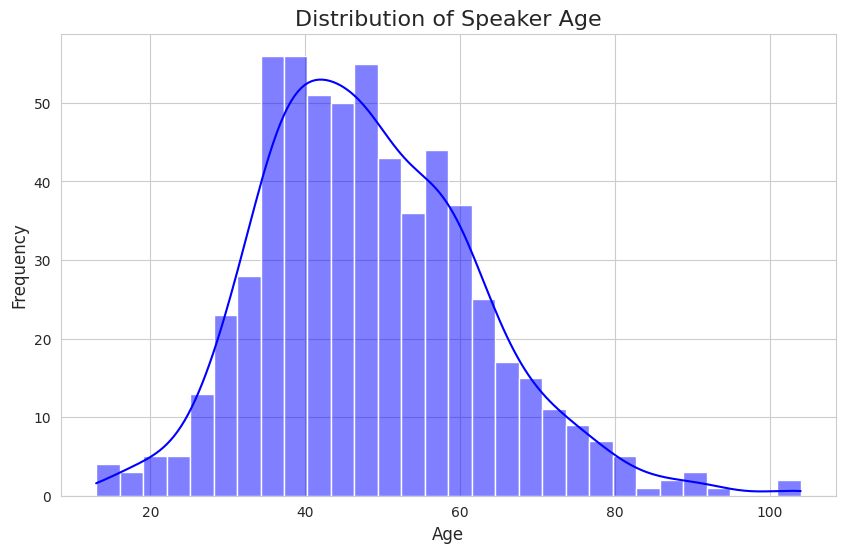

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Distribution of Speaker Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

--- Starting Comprehensive Outlier Analysis for 7 Numerical Columns ---


/tmp/ipython-input-3919440867.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis')


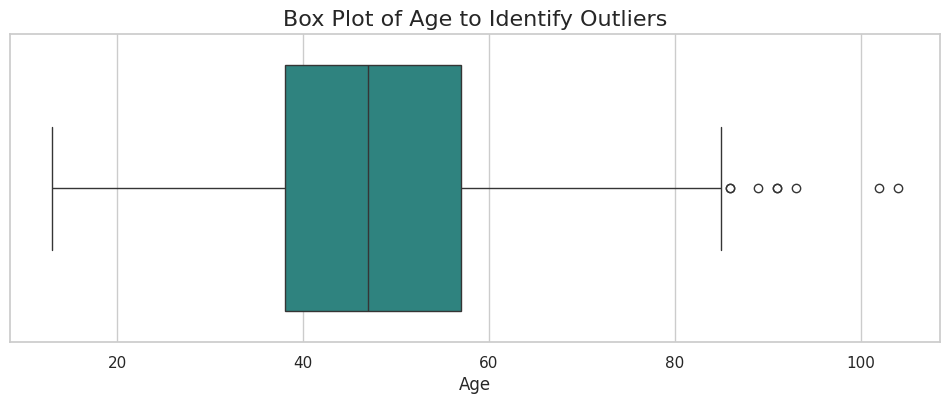


Outlier Detection Report for 'Age'
-----------------------------------
The Interquartile Range (IQR) is: 19.00
Lower Bound (Outlier Threshold): 9.50
Upper Bound (Outlier Threshold): 85.50

Found 8 outliers in the 'Age' column:
                  Name    Age
616     Paul Rothemund  104.0
164        Clint Smith  102.0
409    Jonathan Harris   93.0
403        John Wooden   91.0
386       Jimmy Carter   91.0
245      Elaine Morgan   89.0
89   Benoit Mandelbrot   86.0
129      Carolyn Jones   86.0




/tmp/ipython-input-3919440867.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis')


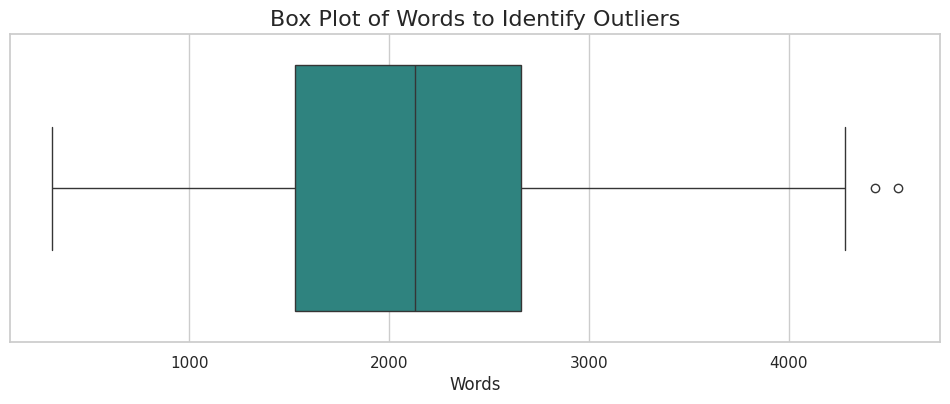


Outlier Detection Report for 'Words'
-------------------------------------
The Interquartile Range (IQR) is: 1132.25
Lower Bound (Outlier Threshold): -170.88
Upper Bound (Outlier Threshold): 4358.12

Found 2 outliers in the 'Words' column:
                         Name  Words
147  Chimamanda Ngozi Adichie   4546
468             Laurie Santos   4434




/tmp/ipython-input-3919440867.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis')


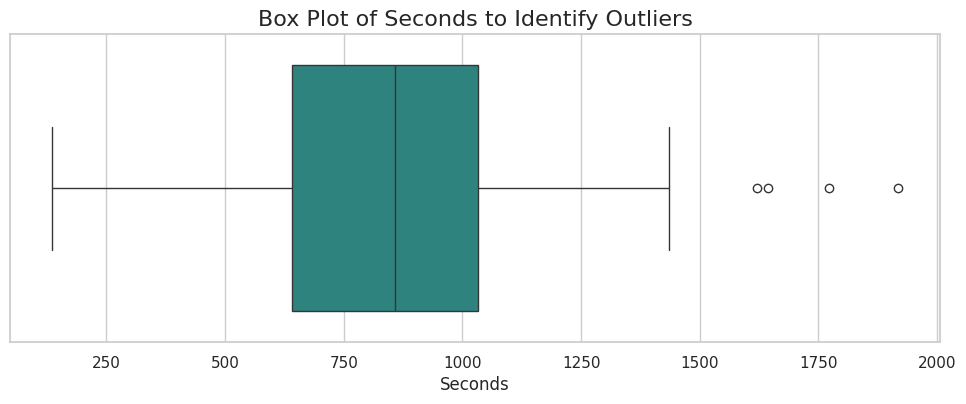


Outlier Detection Report for 'Seconds'
---------------------------------------
The Interquartile Range (IQR) is: 391.75
Lower Bound (Outlier Threshold): 52.62
Upper Bound (Outlier Threshold): 1619.62

Found 4 outliers in the 'Seconds' column:
                         Name  Seconds
588             Norman Foster     1917
147  Chimamanda Ngozi Adichie     1772
359              Jane Goodall     1644
33               Amory Lovins     1621




/tmp/ipython-input-3919440867.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis')


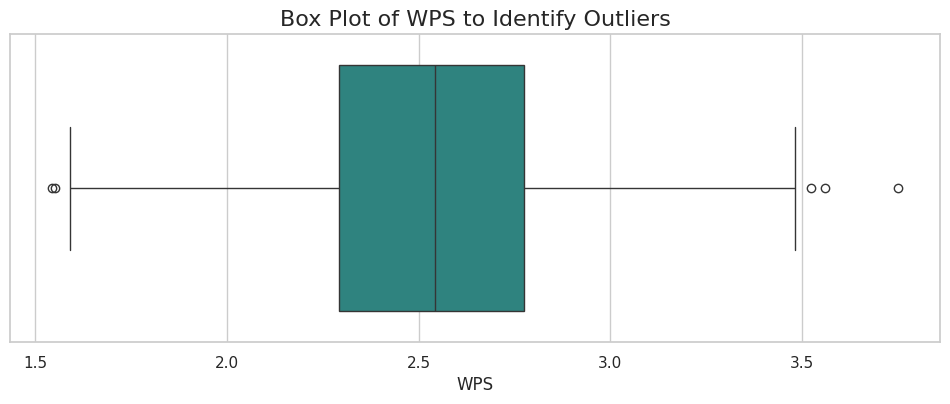


Outlier Detection Report for 'WPS'
-----------------------------------
The Interquartile Range (IQR) is: 0.48
Lower Bound (Outlier Threshold): 1.57
Upper Bound (Outlier Threshold): 3.50

Found 5 outliers in the 'WPS' column:
                  Name    WPS
468      Laurie Santos  3.750
91      Ben Wellington  3.560
110       Brian Skerry  3.523
827  William Kamkwamba  1.551
300         Gill Hicks  1.544




/tmp/ipython-input-3919440867.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis')


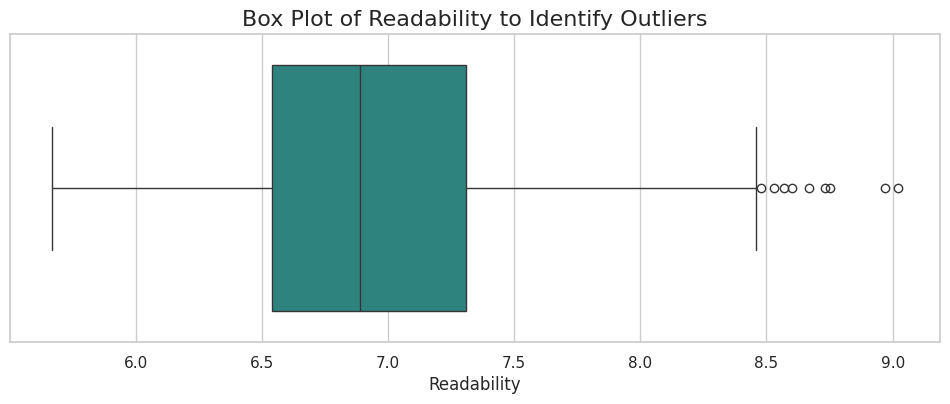

/tmp/ipython-input-3919440867.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis')



Outlier Detection Report for 'Readability'
-------------------------------------------
The Interquartile Range (IQR) is: 0.77
Lower Bound (Outlier Threshold): 5.39
Upper Bound (Outlier Threshold): 8.46

Found 9 outliers in the 'Readability' column:
                  Name  Readability
702    Sanford Biggers         9.02
22     Alice Rawsthorn         8.97
85         Ben Cameron         8.75
216       David Sengeh         8.73
130      Carolyn Porco         8.67
499  Marcin Jakubowski         8.60
783         Tal Danino         8.57
558            Mundano         8.53
82        Bassam Tariq         8.48




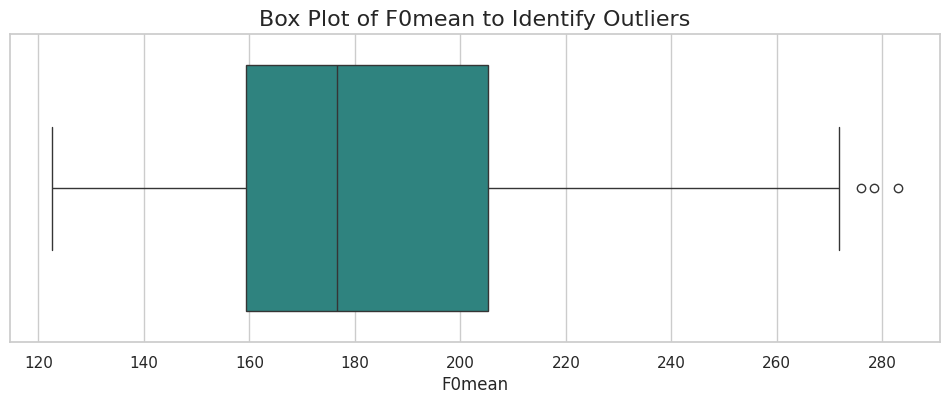


Outlier Detection Report for 'F0mean'
--------------------------------------
The Interquartile Range (IQR) is: 45.95
Lower Bound (Outlier Threshold): 90.39
Upper Bound (Outlier Threshold): 274.18

Found 3 outliers in the 'F0mean' column:
                 Name  F0mean
770  Sunitha Krishnan  282.93
78      Barbara Block  278.35
52         Ann Cooper  276.00




/tmp/ipython-input-3919440867.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis')


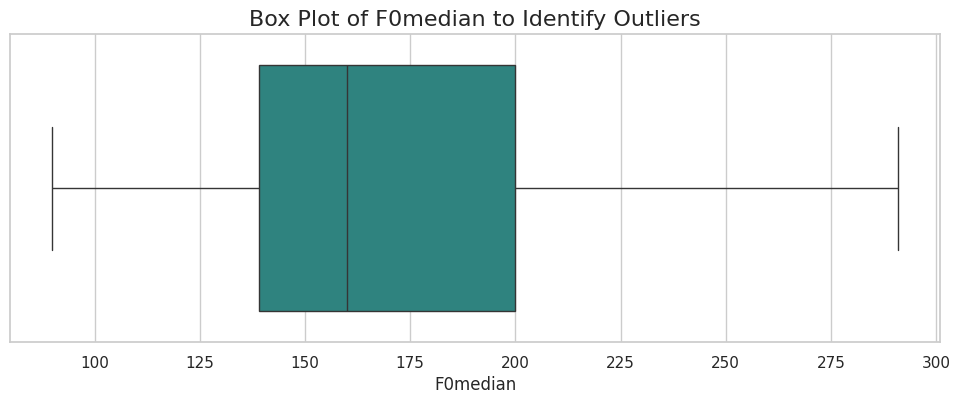


Outlier Detection Report for 'F0median'
----------------------------------------
The Interquartile Range (IQR) is: 60.87
Lower Bound (Outlier Threshold): 47.82
Upper Bound (Outlier Threshold): 291.31

Found 0 outliers in the 'F0median' column:
No outliers were found based on the 1.5 * IQR rule.




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

print(f"--- Starting Comprehensive Outlier Analysis for {len(numerical_cols)} Numerical Columns ---")

# --- Loop through each numerical column to find and visualize outliers ---
for col in numerical_cols:
    # --- 1. Visualize Outliers with a Box Plot for the current column ---
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=df[col], palette='viridis')
    plt.title(f'Box Plot of {col} to Identify Outliers', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.show()

    # --- 2. Programmatically Identify and Display the Outliers ---

    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the outlier boundaries
    # Anything 1.5 times the IQR below Q1 or above Q3 is an outlier.
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to find all rows where the column value is outside the boundaries
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\nOutlier Detection Report for '{col}'")
    print("--------------------------------" + "-" * len(col)) # Dynamic underline
    print(f"The Interquartile Range (IQR) is: {IQR:.2f}")
    print(f"Lower Bound (Outlier Threshold): {lower_bound:.2f}")
    print(f"Upper Bound (Outlier Threshold): {upper_bound:.2f}")
    print(f"\nFound {len(outliers)} outliers in the '{col}' column:")

    # Display the outlier data, sorted by the current column for clarity
    if not outliers.empty:
        # We display the speaker's name and the outlier value for context
        display_cols = ['Name', col]
        print(outliers[display_cols].sort_values(by=col, ascending=False))
    else:
        print("No outliers were found based on the 1.5 * IQR rule.")

    print("\n" + "="*50 + "\n") # Separator for the next column's report



/tmp/ipython-input-1374233179.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='F0mean', data=df, palette='pastel')


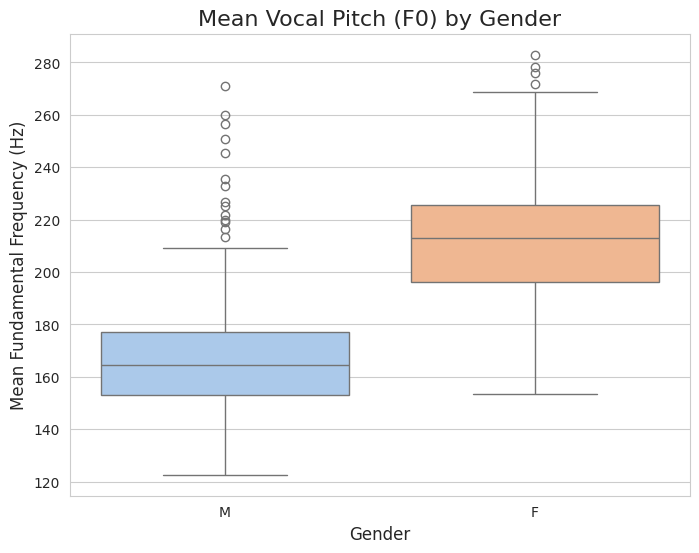

In [ ]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='Gender', y='F0mean', data=df, palette='pastel')
plt.title('Mean Vocal Pitch (F0) by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Mean Fundamental Frequency (Hz)', fontsize=12)
plt.show()

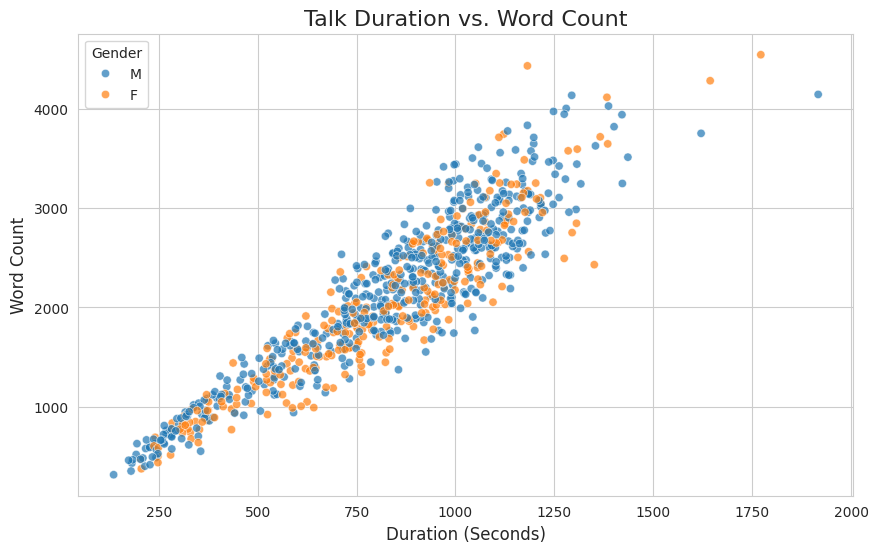

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Seconds', y='Words', data=df, hue='Gender', alpha=0.7)
plt.title('Talk Duration vs. Word Count', fontsize=16)
plt.xlabel('Duration (Seconds)', fontsize=12)
plt.ylabel('Word Count', fontsize=12)
plt.legend(title='Gender')
plt.show()